# K Means Clustering Project 

## Import Libraries

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

<div style="direction:rtl">
مشخصات دیتاست مورد استفاده برای این تمرین که از تعدادی از دانشگاه ها با 18 فیچر مختلف جمع آوری شده است :
<div style="direction:rtl">
هدف نهایی این است که بر اساس ویژگی هایی که داریم مشخص کنیم دانشگاه خصوصی بوده یا دولتی.
<div style="direction:rtl">
دقت کنید که این داده ها در ستون Private ذخیره شده، اما ما نمیخواهیم از آن ها برای آموزش مدل استفاده کنیم و صرفا برای ارزیابی نهایی از آن ها استفاده می کنیم.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Get the Data

<div style="direction:rtl">
دیتاستی که برایتان ارسال شده را بخوانید اما به شکلی که ستون اول آن، ایندکس های شما باشند.

In [160]:
data = pd.read_csv(r"D:\Artificial Intelligence & Robotic\Data Science & Machine Learning - AIR Center\Exercises\Datasets for exercising\Practices Datasets\Practice 11\College_Data.csv", index_col=0)

<div style="direction:rtl">
نگاه خلاصه ای به دیتاست بیندازید و همچنین اطلاعات کلی و آماری آن را نمایش دهید.

In [161]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [163]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Exploratory Data Analysis (EDA)

<div style="direction:rtl">
حالا کمی در دیتاست گشت و گذار کنیم (تحلیل اکتشافی) تا ببینیم به چه اطلاعاتی دست پیدا می کنیم.

<div style="direction:rtl">
اسکتر پلاتی برای Grad.Rate بر حسب Room.Board ترسیم کنید که در آن داده ها بر اساس Private column تفکیک شده باشند.

In [164]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


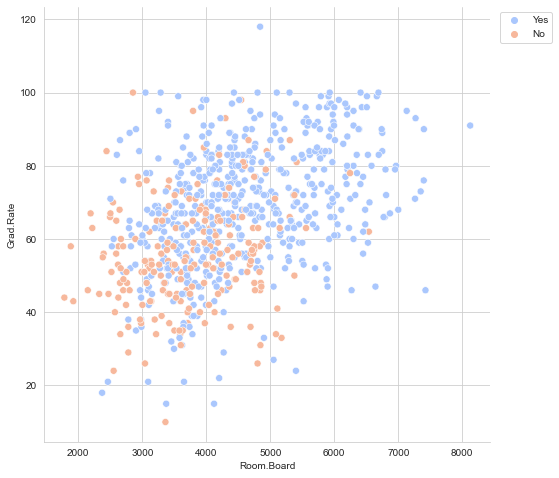

In [165]:
plt.figure(figsize=(8, 8))
sns.set_style('whitegrid')
sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=data, palette='coolwarm', cmap='rainbow', s=50)
sns.despine()
plt.legend(bbox_to_anchor=(1.15, 1))

<div style="direction:rtl">
اسکتر پلاتی برای F.Undergrad بر حسب Outstate ترسیم کنید که در آن داده ها بر اساس Private column تفکیک شده باشند.

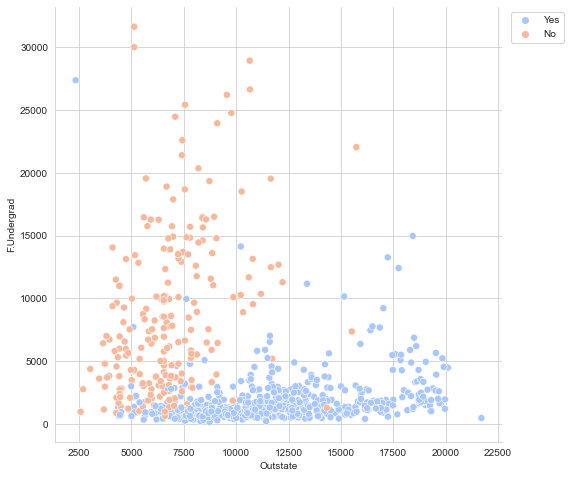

In [166]:
plt.figure(figsize=(8, 8))
sns.despine(top=True, right=True)
sns.scatterplot(x='Outstate', y='F.Undergrad', data=data, hue='Private', palette='coolwarm', s=50)
sns.despine()
plt.legend(bbox_to_anchor=(1.15, 1))

<div style="direction:rtl">
سعی کنید به کمک Facet Grid، نمودار هیستوگرام OutState را به تفکیک ستون Private رسم کنید.
<div style="direction:rtl">
اگر نتوانستید با Facet Grid این کار را بکنید، با رسم دو نمودار در یک صفحه این کار را انجام دهید.

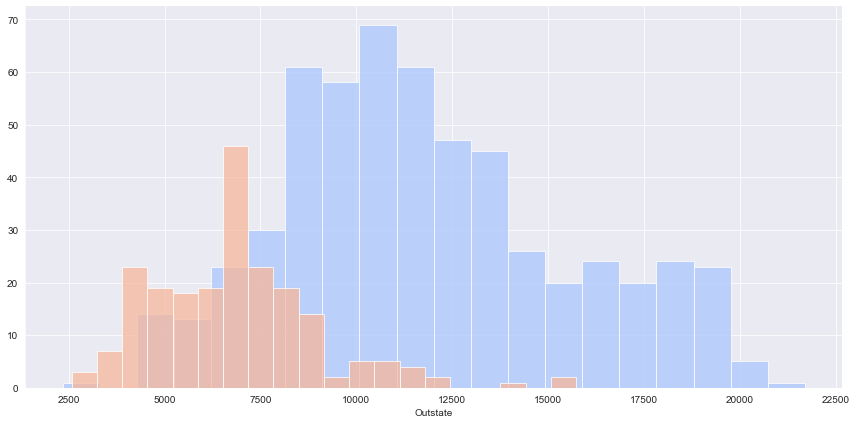

In [167]:
sns.set_style('darkgrid')

facet = sns.FacetGrid(data, hue='Private', palette='coolwarm', height=6, aspect=2)
facet = facet.map(plt.hist, 'Outstate', bins=20, alpha=0.75)

<div style="direction:rtl">
سعی کنید به کمک Facet Grid، نمودار هیستوگرام Grad.Rate را به تفکیک ستون Private رسم کنید.
<div style="direction:rtl">
اگر نتوانستید با Facet Grid این کار را بکنید، با رسم دو نمودار در یک صفحه این کار را انجام دهید.

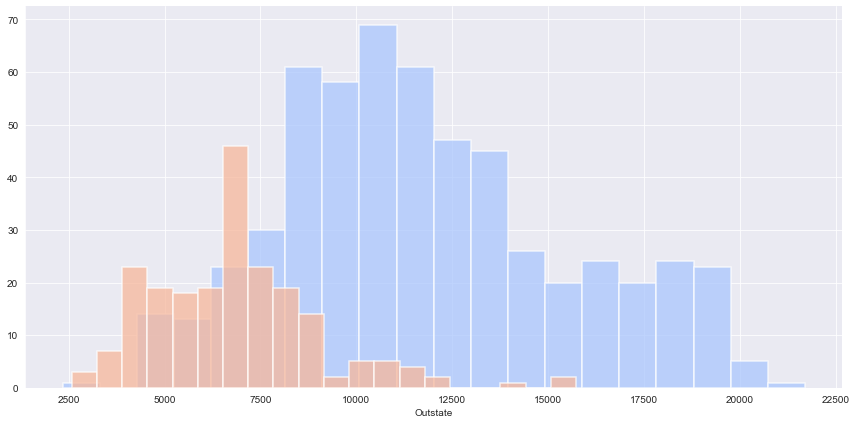

In [168]:
sns.set_style('darkgrid')
facet = sns.FacetGrid(data, hue='Private', palette='coolwarm', height=6, aspect=2)
facet = facet.map(plt.hist, 'Outstate', bins=20, alpha=0.75, linewidth=1.5)

<div style="direction:rtl">
به نظر می آید نمره ی فارغ التحصیلی دانشگاهی بیشتر از 100 شده! این داده را بیابید.

In [169]:
data[data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


<div style="direction:rtl">
این داده را از 120 تبدیل به 100 نمایید و دوباره هیستوگرام را ترسیم کنید.
<div style="direction:rtl">
ممکن است به علت این که در حال تغییرات روی دیتاست اصلی هستید، وارنینگی دریافت کنید که جای نگرانی نیست.

In [170]:
data['Grad.Rate'][95] = 100
data['Grad.Rate'][95]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17748\1702160853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grad.Rate'][95] = 100


100

In [171]:
data[data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


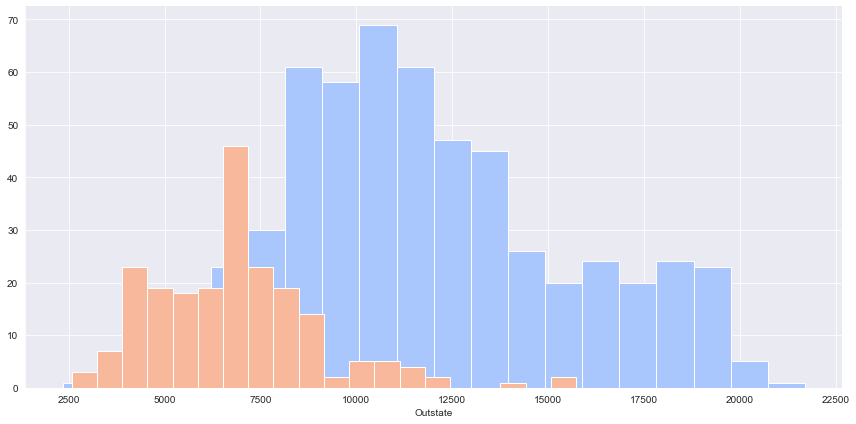

In [172]:
sns.set_style('darkgrid')
facet = sns.FacetGrid(data, hue='Private', palette='coolwarm', height=6, aspect=2)
facet = facet.map(plt.hist, 'Outstate', bins=20)

## K Means Cluster Creation

<div style="direction:rtl">
خب حالا وقت اون رسیده که مدل آن سوپروایزدمون رو بدون این که لیبل های واقعی رو ببینه روی داده ها آموزش بدیم و ازش بخوایم بر اساس ویژگی های مختلف، دانشگاه ها رو به دو قسمت (دولتی و خصوصی) تقسیم کنه.

In [173]:
from sklearn.cluster import KMeans

In [174]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data.drop('Private', axis=1))

KMeans(n_clusters=2)

<div style="direction:rtl">
مراکز خوشه ها :

In [175]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

<div style="direction:rtl">
اصولا به جز سیلوهت اسکور ما روش خاصی برای ارزیابی یه مدل آن سوپر وایزد نداریم اما توی این مثال، ما لیبل ها رو از قبل براتون نگه داشته بودیم تا توی این مرحله بتونید مدلتون رو باهاش ارزیابی بکنید.

<div style="direction:rtl">
اول کلاستر های پیش بینی شده رو چاپ کنید:

In [176]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<div style="direction:rtl">
خب همون طور که میبینید داده ها به دو خوشه ی 0 و 1 تقسیم بندی شدن، حالا یه تابعی بنویسید که ستون Private شما هم یه شکل 0 و 1 ی دربیاره تا بتونید با معیارهایی که از قبل بلدید یه ارزیابی روی مدلتاون داشته باشید.

In [177]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [178]:
data['cluster'] = data['Private'].apply(converter)

In [179]:
data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


<div style="direction:rtl">
خب همون ارزیابی هایی که از قبل بلدید رو به جز score که اینجا معنی نداره پیاده سازی کنید ولی به جای ستون لیبل ها از ستون پرایویت و به جای ستون پیش بینی از کلاستری که کی مینز برای داده ارائه داده استفاده کنید.

In [180]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data['cluster'], kmeans.labels_))
print(classification_report(data['cluster'], kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



<div style="direction:rtl">
خب خیلیم بد نیست، مدل شما تونسته دانشگاه ها رو بر اساس ویژگی های دانشجوهاش مثل میانگین نمره و این چیزا به دو دسته ی دولتی و خصوصی تقسیم کنه، اونم بدون این که بدونه کدوم داده ها مربوط به چه کلاسین. اما حالا داده ها رو اسکیل کنید و دوباره این کار رو انجام بدید.

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit_transform(data.drop(['Private', 'cluster'], axis=1))
scaled_features = scaler.fit_transform(data.drop(['Private', 'cluster'], axis=1))

In [182]:
model = KMeans(n_clusters=2)
model.fit(scaled_features)

KMeans(n_clusters=2)

In [183]:
print(confusion_matrix(data['cluster'], model.labels_))
print(classification_report(data['cluster'], model.labels_))

[[146  66]
 [340 225]]
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



<div style="direction:rtl">
خب دیدیم که توی الگوریتم های مبتنی بر محاسبه ی فاصله، چقدر اسکیل کردن داده ها می تونه موثر باشه و درصد امتیاز ما رو از 10 به 65 ارتقا بده. اما حالا به کمک سیلوهت اسکور بررسی کنید که اگه قرار بود دسته بندی دقیق تری برای دانشگاه ها می داشتیم، اصولا تقسیم بندی دانشگاه ها به چند دسته کار بهتری بود؟

In [184]:
from sklearn.metrics import silhouette_score

In [185]:
def optimal_kmeans(dataset,normalized_dataset,start=2,end=11):
    n_clu = []
    km_ss = []
    for n_clusters in range(start,end):
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(normalized_dataset)
        silhouette_avg = round(silhouette_score(dataset,labels,random_state=1),3)
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        print('NO.Clusters : {}   ,Silhouette Score : {}'.format(n_clusters,silhouette_avg))
    if n_clusters == end -1 :
        plt.figure(figsize=(8,6))
        sns.set_style('darkgrid')
        plt.title('Silhouette Score')
        sns.pointplot(x=n_clu,y=km_ss)

NO.Clusters : 4   ,Silhouette Score : 0.207
NO.Clusters : 5   ,Silhouette Score : 0.19
NO.Clusters : 6   ,Silhouette Score : 0.105
NO.Clusters : 7   ,Silhouette Score : 0.106
NO.Clusters : 8   ,Silhouette Score : 0.08
NO.Clusters : 9   ,Silhouette Score : 0.076
NO.Clusters : 10   ,Silhouette Score : 0.088
NO.Clusters : 11   ,Silhouette Score : 0.057
NO.Clusters : 12   ,Silhouette Score : 0.054
NO.Clusters : 13   ,Silhouette Score : 0.04
NO.Clusters : 14   ,Silhouette Score : 0.046
NO.Clusters : 15   ,Silhouette Score : 0.036
NO.Clusters : 16   ,Silhouette Score : 0.033
NO.Clusters : 17   ,Silhouette Score : 0.017
NO.Clusters : 18   ,Silhouette Score : 0.011
NO.Clusters : 19   ,Silhouette Score : 0.022


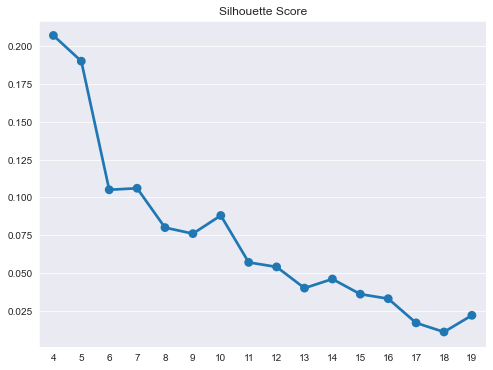

In [186]:
optimal_kmeans(data.drop(['Private','cluster'],axis=1), scaled_features, 4, 20)

<div style="direction:rtl">
خب می بینیم که تعداد کلاستر 6 رو میتونیم به عنوان نقطه ی آرنج در نظر بگیریم و این نقطه جاییه که شیب کاهش اسکور از اونجا به بعد کمتر و ملایم میشه. این یعنی اگه صرف دولتی یا خصوصی بودن دانشکاه ها ملاک نباشه، دانشگاه های این دیتاست رو میشه به 6 دسته ی مختلف تقسیم کرد که توی هر دسته، دانشگاه های اون دسته ویژگی های مشابه به هم و متفاوت از دانشگاه های دسته های دیکه دارند.

<div style="direction:rtl">
و اینم بحث Unsupervised Learning و همون فوت کوزه گری وچشم بسته غیب گفتن بدون دیدن لیبل ها.
<div style="direction:rtl">


# The End :)